<a href="https://colab.research.google.com/github/ZahraMoeini/Regression/blob/main/Ridge%20Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, explained_variance_score, mean_absolute_error, mean_squared_error
import math

In [3]:
link =  "https://raw.githubusercontent.com/ZahraMoeini/Regression/main/Data/kc_house_data.csv"


***Read Data***

In [4]:
data = pd.read_csv(link, error_bad_lines=False )




***`print shape and show 5 first rows`***

In [5]:
print(data.shape)
data.head()

(21613, 21)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


***show null data and show number of null data***

In [6]:
data.isnull
data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

***delete null data***

In [7]:
 data=data.dropna()

***show feature of each elemane***

In [8]:
for column in data:
  unique_vals=np.unique(data[column])
  nr_values=len(unique_vals)
  if nr_values<10:
   print('The number of value of feature:{}/{}/{}'.format(column,nr_values,unique_vals))
  else:
   print('The number of value of feature:{}/{}'.format(column,nr_values))

The number of value of feature:id/21436
The number of value of feature:date/372
The number of value of feature:price/4028
The number of value of feature:bedrooms/13
The number of value of feature:bathrooms/30
The number of value of feature:sqft_living/1038
The number of value of feature:sqft_lot/9782
The number of value of feature:floors/6/[1.  1.5 2.  2.5 3.  3.5]
The number of value of feature:waterfront/2/[0 1]
The number of value of feature:view/5/[0 1 2 3 4]
The number of value of feature:condition/5/[1 2 3 4 5]
The number of value of feature:grade/12
The number of value of feature:sqft_above/946
The number of value of feature:sqft_basement/306
The number of value of feature:yr_built/116
The number of value of feature:yr_renovated/70
The number of value of feature:zipcode/70
The number of value of feature:lat/5034
The number of value of feature:long/752
The number of value of feature:sqft_living15/777
The number of value of feature:sqft_lot15/8689


***visualising a subset of our data***

In [9]:
pairplot1=False
if pairplot1==True:
 g=sns.pairplot(data)

***visualising a subset of our data/important feature***

In [10]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [11]:
pairplot2=False
if pairplot2==True:
  g=sns.pairplot(data[['price','sqft_living','condition']])

In [12]:
pairplot3=False
if pairplot3==True:
  g=sns.pairplot(data[['price','sqft_living','condition']],hue='condition')

In [13]:
lmplot1=False
if lmplot1==True:
  g=sns.lmplot(x='price',y='sqft_living',data=data)

In [14]:
lmplot2=False
if lmplot2==True:
  g=sns.lmplot(x='price',y='sqft_living',data=data, col='floors')

In [15]:
lmplot3=False
if lmplot3==True:
  g=sns.lmplot(x='price',y='sqft_living',data=data, col='floors',col_wrap=3,height=5,scatter_kws={'color':'green'})

In [16]:
lmplot=False
if lmplot==True:
 g=sns.lmplot(x='price',y='sqft_living',data=data, col='floors',col_wrap=3,height=5,scatter_kws={'color':'green'},ci=False)

In [17]:
boxplot=False
if boxplot==True:
 pal=['green','red']
 g=sns.boxplot(x='price',y='sqft_living',data=data,hue='waterfront',palette=pal)

***cleaning data***

In [18]:
data.shape[0]

21613

In [19]:
data[data['floors']>3]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
875,6306400140,20140612T000000,1095000.0,0,0.00,3064,4764,3.5,0,2,3,7,3064,0,1990,0,98102,47.6362,-122.322,2360,4000
10077,1972202010,20140801T000000,435000.0,3,3.00,1440,1350,3.5,0,2,3,8,1440,0,2005,0,98103,47.6525,-122.345,1440,1350
11594,3180100023,20150130T000000,544000.0,3,2.50,1760,1755,3.5,0,0,3,8,1760,0,1998,0,98105,47.6688,-122.279,1700,1721
14885,8673400177,20150402T000000,525000.0,3,3.00,1730,1074,3.5,0,0,3,8,1730,0,2006,0,98107,47.6692,-122.392,1370,1185
15424,1702900664,20150416T000000,479000.0,2,2.50,1730,1037,3.5,0,0,3,8,1730,0,2008,0,98118,47.5594,-122.285,1280,1026
18477,1346300150,20141020T000000,3300000.0,8,4.00,7710,11750,3.5,0,0,5,12,6090,1620,1904,0,98112,47.6263,-122.314,4210,8325
20308,1972200426,20140918T000000,525000.0,2,2.75,1310,1268,3.5,0,0,3,8,1310,0,2007,0,98103,47.6534,-122.355,1350,1288
20772,1972200428,20140625T000000,563500.0,3,2.50,1400,1312,3.5,0,0,3,8,1400,0,2007,0,98103,47.6534,-122.355,1350,1312


In [20]:
data1=data[data['floors']<=3]
data.shape[0]

21613

In [21]:
data[data['floors']>3]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
875,6306400140,20140612T000000,1095000.0,0,0.00,3064,4764,3.5,0,2,3,7,3064,0,1990,0,98102,47.6362,-122.322,2360,4000
10077,1972202010,20140801T000000,435000.0,3,3.00,1440,1350,3.5,0,2,3,8,1440,0,2005,0,98103,47.6525,-122.345,1440,1350
11594,3180100023,20150130T000000,544000.0,3,2.50,1760,1755,3.5,0,0,3,8,1760,0,1998,0,98105,47.6688,-122.279,1700,1721
14885,8673400177,20150402T000000,525000.0,3,3.00,1730,1074,3.5,0,0,3,8,1730,0,2006,0,98107,47.6692,-122.392,1370,1185
15424,1702900664,20150416T000000,479000.0,2,2.50,1730,1037,3.5,0,0,3,8,1730,0,2008,0,98118,47.5594,-122.285,1280,1026
18477,1346300150,20141020T000000,3300000.0,8,4.00,7710,11750,3.5,0,0,5,12,6090,1620,1904,0,98112,47.6263,-122.314,4210,8325
20308,1972200426,20140918T000000,525000.0,2,2.75,1310,1268,3.5,0,0,3,8,1310,0,2007,0,98103,47.6534,-122.355,1350,1288
20772,1972200428,20140625T000000,563500.0,3,2.50,1400,1312,3.5,0,0,3,8,1400,0,2007,0,98103,47.6534,-122.355,1350,1312


***selecting usefull data only***

In [22]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [23]:
data=data[['price','bedrooms','sqft_living','floors','condition','date']]

In [24]:
data.head()

,price,bedrooms,sqft_living,floors,condition,date
0,221900.0,3,1180,1.0,3,20141013T000000
1,538000.0,3,2570,2.0,3,20141209T000000
2,180000.0,2,770,1.0,3,20150225T000000
3,604000.0,4,1960,1.0,5,20141209T000000
4,510000.0,3,1680,1.0,3,20150218T000000


***making categorical variable into numeric representation***

In [25]:
data=pd.get_dummies(data,columns=['date'])

In [26]:
data.head()

,price,bedrooms,sqft_living,floors,condition,date_20140502T000000,date_20140503T000000,date_20140504T000000,date_20140505T000000,date_20140506T000000,date_20140507T000000,date_20140508T000000,date_20140509T000000,date_20140510T000000,date_20140511T000000,date_20140512T000000,date_20140513T000000,date_20140514T000000,date_20140515T000000,date_20140516T000000,date_20140517T000000,date_20140518T000000,date_20140519T000000,date_20140520T000000,date_20140521T000000,date_20140522T000000,date_20140523T000000,date_20140524T000000,date_20140525T000000,date_20140526T000000,date_20140527T000000,date_20140528T000000,date_20140529T000000,date_20140530T000000,date_20140531T000000,date_20140601T000000,date_20140602T000000,date_20140603T000000,date_20140604T000000,date_20140605T000000,...,date_20150408T000000,date_20150409T000000,date_20150410T000000,date_20150411T000000,date_20150412T000000,date_20150413T000000,date_20150414T000000,date_20150415T000000,date_20150416T000000,date_20150417T000000,date_20150418T000000,date_20150419T000000,date_20150420T000000,date_20150421T000000,date_20150422T000000,date_20150423T000000,date_20150424T000000,date_20150425T000000,date_20150426T000000,date_20150427T000000,date_20150428T000000,date_20150429T000000,date_20150430T000000,date_20150501T000000,date_20150502T000000,date_20150503T000000,date_20150504T000000,date_20150505T000000,date_20150506T000000,date_20150507T000000,date_20150508T000000,date_20150509T000000,date_20150510T000000,date_20150511T000000,date_20150512T000000,date_20150513T000000,date_20150514T000000,date_20150515T000000,date_20150524T000000,date_20150527T000000
0,221900.0,3,1180,1.0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,538000.0,3,2570,2.0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,180000.0,2,770,1.0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,604000.0,4,1960,1.0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,510000.0,3,1680,1.0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


***feature sealection***

2 ways to help us select the important features are:

1.   Correlation
2.   Feature importance  



Correlation:


In [27]:
data.columns


Index(['price', 'bedrooms', 'sqft_living', 'floors', 'condition',
       'date_20140502T000000', 'date_20140503T000000', 'date_20140504T000000',
       'date_20140505T000000', 'date_20140506T000000',
       ...
       'date_20150508T000000', 'date_20150509T000000', 'date_20150510T000000',
       'date_20150511T000000', 'date_20150512T000000', 'date_20150513T000000',
       'date_20150514T000000', 'date_20150515T000000', 'date_20150524T000000',
       'date_20150527T000000'],
      dtype='object', length=377)

In [29]:
hm=data[['price', 'bedrooms', 'sqft_living', 'floors', 'condition',]].corr()

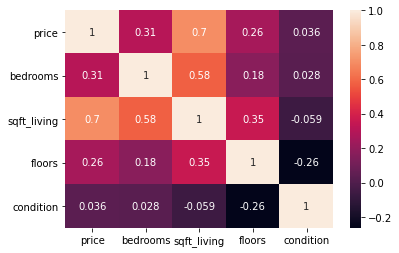

In [32]:
g=sns.heatmap(hm,annot=True,annot_kws={'size':10})

Feature importance:
1. split the data into X,Y
2. Run a Tree-based estimators(i.e.decision Trees& random forests)
3. Run Feature importance

In [35]:
x=data.drop('price',axis=1).values
y=data['price']
dt=DecisionTreeClassifier(random_state=15,criterion='entropy',max_depth=10)
dt.fit(x,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=15, splitter='best')

***Running feature Importance***

In [43]:
for i,column in enumerate(data.drop('price',axis=1)):
  print('The Feature importance for {} is:{:.3f}'.format(column, dt.feature_importances_[i]))

The Feature importance for bedrooms is:0.066
The Feature importance for sqft_living is:0.785
The Feature importance for floors is:0.076
The Feature importance for condition is:0.072
The Feature importance for date_20140502T000000 is:0.000
The Feature importance for date_20140503T000000 is:0.000
The Feature importance for date_20140504T000000 is:0.000
The Feature importance for date_20140505T000000 is:0.000
The Feature importance for date_20140506T000000 is:0.000
The Feature importance for date_20140507T000000 is:0.000
The Feature importance for date_20140508T000000 is:0.000
The Feature importance for date_20140509T000000 is:0.000
The Feature importance for date_20140510T000000 is:0.000
The Feature importance for date_20140511T000000 is:0.000
The Feature importance for date_20140512T000000 is:0.000
The Feature importance for date_20140513T000000 is:0.000
The Feature importance for date_20140514T000000 is:0.000
The Feature importance for date_20140515T000000 is:0.000
The Feature importan